In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
raw_df = pd.read_csv('Zomato_Mumbai_Dataset.csv', delimiter = "|")

In [3]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [4]:
raw_df.shape

(15081, 12)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15081 non-null  object
 1   PRICE            15080 non-null  object
 2   CUSINE_CATEGORY  15079 non-null  object
 3   CITY             15080 non-null  object
 4   REGION           15080 non-null  object
 5   URL              15080 non-null  object
 6   PAGE NO          15080 non-null  object
 7   CUSINE TYPE      15080 non-null  object
 8   TIMING           15015 non-null  object
 9   RATING_TYPE      14070 non-null  object
 10  RATING           15080 non-null  object
 11  VOTES            15080 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [6]:
raw_df.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15081,15080,15079,15080,15080,15080,15080,15080,15015,14070,15080,15080
unique,12720,67,3183,2,241,13823,944,23,2551,31,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14138,942,942,942,5262,1192,5112,2360,2360


In [7]:
wrong_data = raw_df["PAGE NO"] == "PAGE NO"
raw_df[wrong_data]

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
31,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
47,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
63,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
79,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15016,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15032,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15048,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES


In [8]:
raw_df = raw_df[~wrong_data]

In [9]:
raw_df.drop(['URL', 'PAGE NO', 'CITY'], axis = 1, inplace=True)

In [10]:
raw_df.isnull().sum()

NAME                  0
PRICE                 1
CUSINE_CATEGORY       2
REGION                1
CUSINE TYPE           1
TIMING               66
RATING_TYPE        1011
RATING                1
VOTES                 1
dtype: int64

In [11]:
raw_df[raw_df['PRICE'].isnull()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
raw_df = raw_df.drop(labels =15080, axis =0)

In [13]:
raw_df.fillna('NA',inplace = True)

In [14]:
raw_df.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

In [15]:
raw_df['RATING'].value_counts()

RATING
-          2360
3.5        1094
3.4        1036
3.6         960
NEW         953
3.3         926
3.7         917
3.2         801
3.8         782
3.1         734
3.0         622
3.9         596
2.9         409
4.0         408
2.8         309
4.1         298
4.2         199
2.7         170
4.3         148
4.4          99
2.6          77
Opening      57
4.5          46
2.5          39
4.6          32
2.4          26
4.7          13
2.3          10
2.1           5
2.2           4
4.8           4
4.9           2
1.8           1
2.0           1
Name: count, dtype: int64

In [16]:
# raw_df['RATING'].replace(to_replace=['New','Opening'] value ='0', inplace = True)
raw_df['RATING'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)

C:\Users\nandh\AppData\Local\Temp\ipykernel_21052\1989688377.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [17]:
raw_df['VOTES'].value_counts()

VOTES
-       2360
NEW      953
4        364
5        320
6        288
        ... 
1029       1
7350       1
964        1
585        1
1249       1
Name: count, Length: 1123, dtype: int64

In [18]:
raw_df['VOTES'].replace(to_replace=['-','NEW','Opening'], value='0', inplace = True)

C:\Users\nandh\AppData\Local\Temp\ipykernel_21052\2481018212.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [19]:
raw_df['PRICE']= raw_df['PRICE'].astype('int64')
raw_df['RATING']= raw_df['RATING'].astype('float64')
raw_df['VOTES']= raw_df['VOTES'].astype('int64')


In [20]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.1+ MB


In [21]:
raw_df['TIMING'].value_counts()

TIMING
11am to 11pm(Mon-Sun)                              1192
11am to 12midnight(Mon-Sun)                         632
12noon to 12midnight(Mon-Sun)                       467
11am to 1130pm(Mon-Sun)                             309
10am to 10pm(Mon-Sun)                               267
                                                   ... 
1130am to 4pm,630pm to 1230AM...                      1
12midnight to 5am,12noon to 12midnight(Mon-Sun)       1
12midnight to 1230AM,12noon to 4pm,7pm to ...         1
12noon to 330pm,630pm to 12midnight...                1
8am to 11pm,12midnight to 115am(Mon-Sun)              1
Name: count, Length: 2551, dtype: int64

In [22]:
temp_df = raw_df['TIMING'].str.split('(', n=1, expand = True)

In [23]:
raw_df['TIMING'] = temp_df[0]
raw_df['DAYS_OPEN'] = temp_df[1]
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun)
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun)
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun)
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun)
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun)


In [24]:
raw_df['DAYS_OPEN'] = raw_df['DAYS_OPEN'].str.replace(r'\)','',regex=True)
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun


In [25]:
raw_df.isnull().sum()

NAME                 0
PRICE                0
CUSINE_CATEGORY      0
REGION               0
CUSINE TYPE          0
TIMING               0
RATING_TYPE          0
RATING               0
VOTES                0
DAYS_OPEN          160
dtype: int64

In [26]:
raw_df.fillna('NA', inplace =True)

In [27]:
raw_df.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
DAYS_OPEN          0
dtype: int64

In [28]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
 9   DAYS_OPEN        14138 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


In [29]:

useless_data = (raw_df['RATING'] == 0.0) | (raw_df['VOTES'] == 0)
raw_df[useless_data]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
32,Hotel Annapoorna Refreshments,400,"Maharashtrian,Mughlai,Chinese",Ghansoli,Quick Bites,1030am to 1230AM,Not rated,0.0,0,Mon-Sun
34,Biryani 9,600,"Biryani,North Indian",Near Andheri East Station,none,11am to 3am,NA,0.0,0,Mon-Sun
36,D Fusion Flavours,350,Chinese,Goregaon East,none,"12noon to 330pm,7pm to 3am",NA,0.0,0,Mon-Sun
39,Nation Tadka,400,"North Indian,South Indian,Chinese,Fast Food",Worli,none,12noon to 1230AM,Not rated,0.0,0,Mon-Sun
83,Link Way Restaurant,500,"North Indian,Chinese",Jogeshwari,Quick Bites,"12noon to 4pm,8pm to 1am",Not rated,0.0,0,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14998,Foodies House,0,Chinese,Goregaon East,none,12noon to 4am,NA,0.0,0,Mon-Sun
14999,Khansama,0,Biryani,Lower Parel,none,12noon to 3am,NA,0.0,0,Mon-Sun
15010,Earth Cafe @ Waterfield,800,"Cafe,Healthy Food,Italian,Pizza,Beverages",Linking Road-- Bandra West,Café,10am to 10pm,NA,0.0,0,"Mon-Thu,10am to 11pm(Fri-Sun"
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,12noon to 3am,NA,0.0,0,Mon-Sun


In [30]:
raw_df = raw_df[~useless_data]
raw_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Oshiwara-- Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,11am to 11pm,Average,3.4,99,"Mon,Tue,Wed,Thu,Sun,11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM,Good,3.5,29,Mon-Sun


In [31]:
raw_df['RATING_TYPE'].value_counts()

RATING_TYPE
Average          5111
Good             4330
Very Good        1137
Excellent          95
Poor               47
Veľmi dobré         6
Skvělá volba        4
Dobrze              4
Bardzo dobrze       3
Ortalama            2
Bueno               2
İyi                 2
Buono               2
Dobré               2
Bom                 2
Priemer             2
Průměr              2
Muito Bom           2
Promedio            2
Muy Bueno           1
Sangat Baik         1
Média               1
Biasa               1
Skvělé              1
Baik                1
Çok iyi             1
Excelente           1
Velmi dobré         1
Media               1
Name: count, dtype: int64

In [32]:
raw_df['RATING_TYPE'].replace(to_replace = 'Excelente',value = 'Excellent',inplace =True) 
raw_df['RATING_TYPE'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good', inplace = True)
raw_df['RATING_TYPE'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good', inplace = True)
raw_df['RATING_TYPE'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True)

C:\Users\nandh\AppData\Local\Temp\ipykernel_21052\3781106991.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\nandh\AppData\Local\Temp\ipykernel_21052\3781106991.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [33]:
raw_df['RATING_TYPE'].value_counts()

RATING_TYPE
Average      5115
Good         4347
Very Good    1148
Excellent      96
Poor           57
Very Poor       4
Name: count, dtype: int64

In [34]:
raw_df['REGION'].value_counts()

REGION
Mira Road                            405
Malad West                           308
Chembur                              277
Kharghar                             268
Borivali West                        264
                                    ... 
Hotel Emerald-- Juhu                   1
Trident-- Bandra Kurla Complex         1
Sea Princess-- Juhu                    1
Aureole Hotel-- Andheri East           1
Hotel Satkar Residency-- Majiwada      1
Name: count, Length: 237, dtype: int64

In [35]:
raw_df['REGION'] = raw_df['REGION'].str.replace('[a-zA-Z].+-- ','', regex = True)

In [36]:
raw_df['REGION'] = raw_df['REGION'].str.replace('West|East|west|east','', regex = True)
raw_df['REGION'].value_counts()

REGION
Thane                726
Mira Road            412
Andheri              409
Malad                378
Kandivali            377
                    ... 
Kalyan                 2
Girgaon Chowpatty      1
CBD Belapur            1
Goregaon               1
Dadar                  1
Name: count, Length: 104, dtype: int64

In [37]:
raw_df['REGION'] = raw_df['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area','Andheri',regex = True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Runwal Green','Mulund',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Kamothe','Sion',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

In [38]:
raw_df['REGION'].value_counts()

REGION
Thane          726
Andheri        465
Mira Road      412
Malad          378
Kandivali      377
              ... 
Mulund           7
Gorai            7
Peddar Road      4
Kalyan           2
Goregaon         1
Name: count, Length: 88, dtype: int64

In [39]:
raw_df[raw_df.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
4064,Sai Sannidhi Restaurant & Bar,1000,"North Indian,Konkan",Dahisar,Casual Dining,11am to 12midnight,Good,3.7,99,Mon-Sun
4068,Konkan Katta,400,"Seafood,Maharashtrian,Malwani",Mahakali,Quick Bites,"11am to 330pm,630pm to 1130pm",Good,3.5,181,Mon-Sun
4082,Usmaniya Hotel,600,Mughlai,Fort,Casual Dining,1030am to 1130pm,Average,3.2,8,Mon-Sun
4083,Gina's Cakes,450,Bakery,Dombivali,none,11am to 11pm,Good,3.5,49,Mon-Sun
4084,Konkanastha Lunch Home,400,"Seafood,Malwani",Chakala,Casual Dining,"12noon to 3pm,730pm to 1030pm",Good,3.5,44,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14200,Mezbaan Family Restaurant,350,"Chinese,Mughlai",Mumbra,Dhaba,12noon to 1230AM,Average,2.8,97,Mon-Sun
14204,Jyoti Lunch Home,650,"Chinese,North Indian,Seafood,Mughlai",Mulund,Casual Dining,11am to 1230AM,Good,3.5,49,Mon-Sun
14253,On Toes,900,"Italian,North Indian,Chinese",Malad,Casual Dining,"12noon to 3pm,7pm to 1230AM",Good,3.6,76,Mon-Sun
14761,Frosty Farm,400,"Ice Cream,Desserts,Fast Food",Malad,Dessert Parlor,1pm to 1215AM,Good,3.6,120,Mon-Sun


In [40]:
raw_df= raw_df.drop_duplicates()

In [41]:
Zomato_df = raw_df.copy()

In [42]:
Zomato_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun


__Performing Exploratory Data Analysis
Q1) How many restaurants are in Mumbai for each type of cuisine?__

In [44]:
Zomato_df.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
DAYS_OPEN          0
dtype: int64

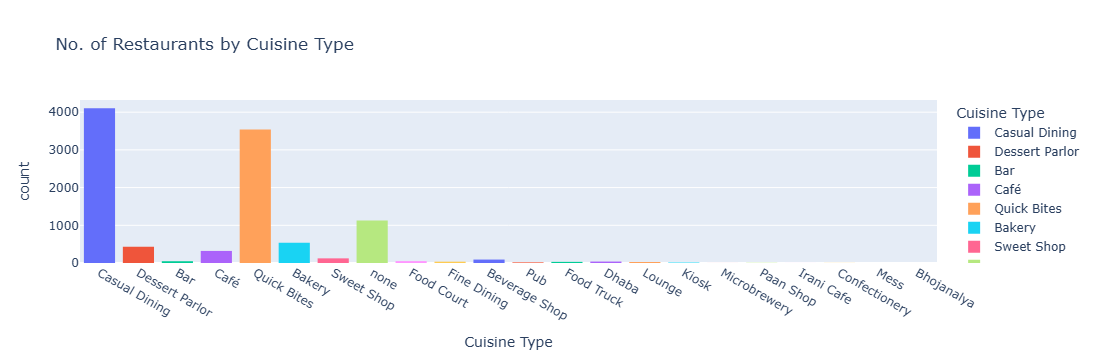

In [45]:
fig = px.histogram(Zomato_df, x='CUSINE TYPE', color='CUSINE TYPE',
title= 'No. of Restaurants by Cuisine Type',
labels={'CUSINE TYPE':'Cuisine Type'})
fig.show() 

__Q2) What are the percentage of restaurants by Rating Type in Mumbai?__

In [47]:
ratingtype_df = Zomato_df['RATING_TYPE'].value_counts().reset_index()
# ratingtype_df.rename(columns={'index':'RATING TYPE','RATING_TYPE':'Count of Restaurants'},inplace =True)
# ratingtype_df
ratingtype_df.rename(columns={'RATING_TYPE':'RATING TYPE', 'count':'COUNT OF RESTAURANTS'}, inplace=True)
ratingtype_df

,RATING TYPE,COUNT OF RESTAURANTS
0,Average,4983
1,Good,4263
2,Very Good,1145
3,Excellent,96
4,Poor,56
5,Very Poor,4


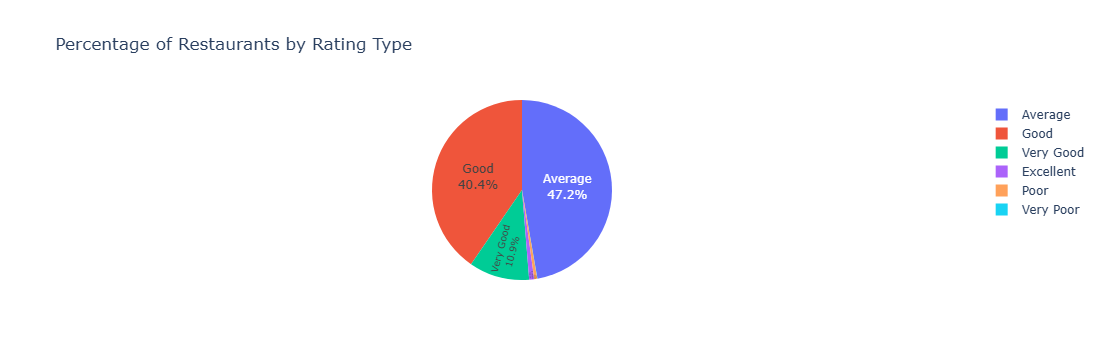

In [48]:
fig = px.pie(ratingtype_df, names='RATING TYPE', values='COUNT OF RESTAURANTS', color='RATING TYPE',
title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

__Q3) Which are the Top 10 highest rated Seafood Restaurant in Mumbai?__

In [50]:
seafood_df = Zomato_df[Zomato_df['CUSINE_CATEGORY'].str.contains('Seafood')]
seafood_df.sort_values(by='RATING',ascending=False).head(10)


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
7104,Thangabali,1000,"Seafood,South Indian,Mangalorean,Andhra,Kerala",Khar,Bar,"12noon to 4pm,7pm to 3am",Excellent,4.7,564,Mon-Sun
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,1130am to 1130pm,Excellent,4.6,350,Mon-Sun
13685,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,"11am to 345pm,7pm to 1145pm",Excellent,4.6,209,Mon-Sun
12433,Quarter Canteen,1100,"North Indian,Seafood,Chinese",Bandra,Casual Dining,"12noon to 330pm,7pm to 1am",Excellent,4.5,573,Mon-Sun
902,The Harbour Bay - SeaFood Kitchen & Bar,2400,"Seafood,Beverages",Bandra,Casual Dining,12noon to 1am,Excellent,4.5,100,Mon-Sun
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,11am to 11pm,Excellent,4.5,178,Mon-Sun
3380,Peco Peco,700,"Chinese,Seafood,Asian",Powai,none,"12noon to 330pm,7pm to 1230AM",Excellent,4.5,497,Mon-Sun
9954,Pi Bar and Kitchen,1600,"Continental,European,Italian,Seafood,Pizza,Des...",Andheri,Bar,"12noon to 6pm,7pm to 12midnight",Excellent,4.5,2068,Mon-Sun
903,Ferry Wharf,1500,"Seafood,Mangalorean",Bandra,Casual Dining,"11am to 330pm,7pm to 1230AM",Very Good,4.4,459,Mon-Sun
915,Monis Bar and Restaurant,1000,"North Indian,Chinese,Continental,Seafood,Bever...",Thane,Casual Dining,"1130am to 330pm,6pm to 1130pm",Very Good,4.4,662,Mon-Sun


__Q4) Which is the best Food Truck in Mumbai?__

In [52]:
foodtruck_df =Zomato_df[Zomato_df['CUSINE TYPE'] == 'Food Truck']
foodtruck_df.sort_values(by = 'RATING', ascending= False).head(3)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
262,Dumpling Delights,200,Momos,Matunga,Food Truck,430pm to 930pm,Very Good,4.3,212,Mon-Sun
1017,Street Food Co.,250,"Fast Food,Chinese",Virar,Food Truck,6pm to 3am,Very Good,4.1,274,Mon-Sun
7922,Honeys Delights,100,"Fast Food,Burger",Malad,Food Truck,Closed,Good,3.9,66,"Mon,4am to 7am(Tue-Sun"


__Q5) Which places have the highest rated restaurant for each Cuisine Type in Mumbai?__

In [54]:
highrated_cusine =Zomato_df[Zomato_df['RATING']>=4.5]
highrated_cusine

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
7,Tanatan,1500,Modern Indian,Juhu,Casual Dining,12noon to 130am,Excellent,4.7,1842,Mon-Sun
9,Plum by Bent Chair,1800,Asian,Lower Parel,Casual Dining,12noon to 1am,Excellent,4.7,1876,Mon-Sun
10,Angrezi Dhaba,1500,"North Indian,Chinese,Thai,European",Dadar,Bar,12noon to 1am,Excellent,4.5,2092,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14228,Zaika Crave - Club Aquaria,1300,"North Indian,Continental,Chinese,Desserts",Borivali,Casual Dining,"11am to 330pm,7pm to 1130pm",Excellent,4.5,1302,"Mon,Tue,Wed..."
14234,Cone Culture,250,European,Kharghar,Casual Dining,Closed,Excellent,4.6,492,"Mon,12noon to 11pm(Tue-Sun"
15007,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,11am to 12midnight,Excellent,4.8,184,Mon-Sun
15051,Tick-eat,800,"North Indian,Italian,Chinese,Mexican,Lebanese",Mulund,Casual Dining,"1130am to 330pm,7pm to 1130pm",Excellent,4.5,754,Mon-Sun


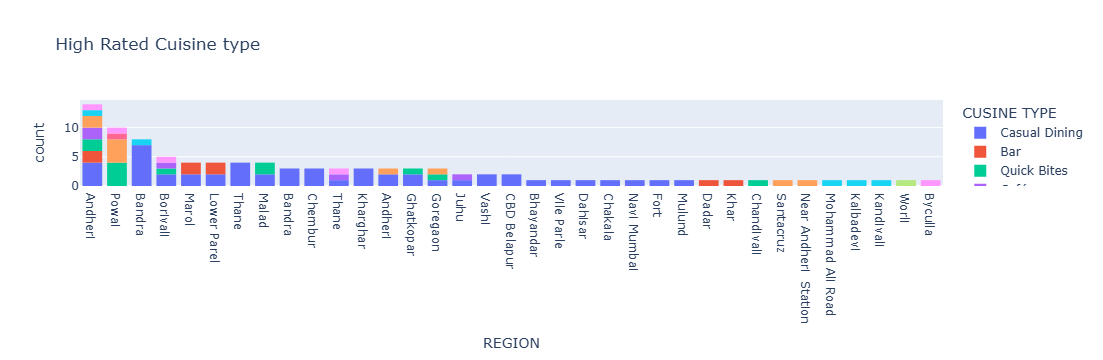

In [55]:
fig = px.histogram(highrated_cusine, x='REGION', color = 'CUSINE TYPE', title='High Rated Cuisine type').update_xaxes(categoryorder = 'total descending')
fig.show()

__Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Mumbai?__

In [57]:
avg_rated= highrated_cusine.groupby(by=['REGION','CUSINE TYPE'])['PRICE'].mean().reset_index()
avg_rated.head(10)

,REGION,CUSINE TYPE,PRICE
0,Andheri,Casual Dining,1100.000000
1,Andheri,none,350.000000
2,Andheri,Bar,1600.000000
3,Andheri,Café,800.000000
4,Andheri,Casual Dining,1212.500000
5,Andheri,Dessert Parlor,300.000000
6,Andheri,Lounge,1700.000000
7,Andheri,Quick Bites,350.000000
8,Andheri,none,500.000000
9,Bandra,Casual Dining,1666.666667


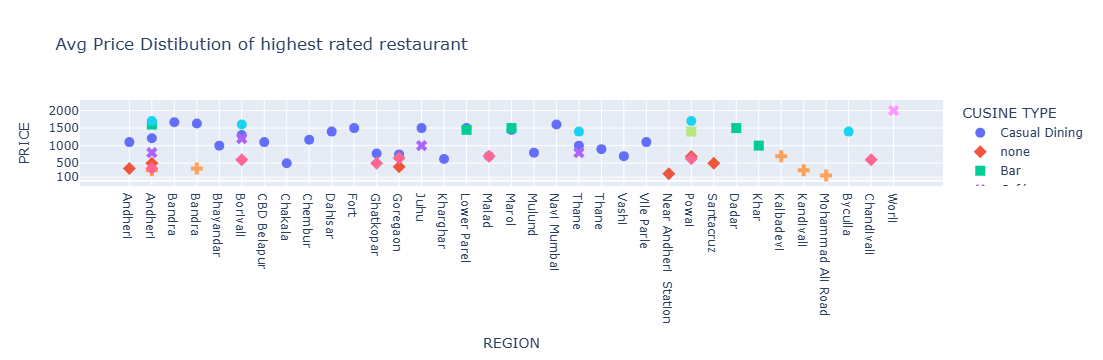

In [58]:
fig=px.scatter(avg_rated, x='REGION',y='PRICE', color = 'CUSINE TYPE',symbol='CUSINE TYPE' , title='Avg Price Distibution of highest rated restaurant').update_traces(marker_size=10).update_yaxes(tickvals=[100, 500, 1000, 1500, 2000])
fig.show()

__Q7) Which areas have a large number of Chinese Restaurant Market?__

In [60]:
chinese_rest = Zomato_df[Zomato_df['CUSINE_CATEGORY'].str.contains('Chinese')]
chinese_rest

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
5,Flea Bazaar Café,800,"American,Asian,Street Food,North Indian,Luckno...",Lower Parel,Café,12noon to 1am,Very Good,4.2,2042,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15071,Lucknow Zaika,500,"North Indian,Chinese",Kurla,Quick Bites,12noon to 2am,Average,2.6,36,Mon-Sun
15072,Zuha's Kitchen,400,"Chinese,North Indian,Mughlai",Mumbai Central,Quick Bites,"12noon to 4pm,730pm to 430am",Average,3.3,13,Mon-Sun
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun


In [61]:
chinese_rest_df = chinese_rest.groupby(by='REGION').agg({'NAME' : 'count', 'PRICE' : 'mean'}).rename(columns= {'NAME' : 'COUNT OF RESTAURANTS'}).reset_index()
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)
chinese_rest_df.head()


,REGION,COUNT OF RESTAURANTS,PRICE
79,Thane,348,588.376437
56,Mira Road,224,553.348214
50,Malad,186,604.032258
31,Goregaon,162,545.987654
4,Andheri,161,657.142857


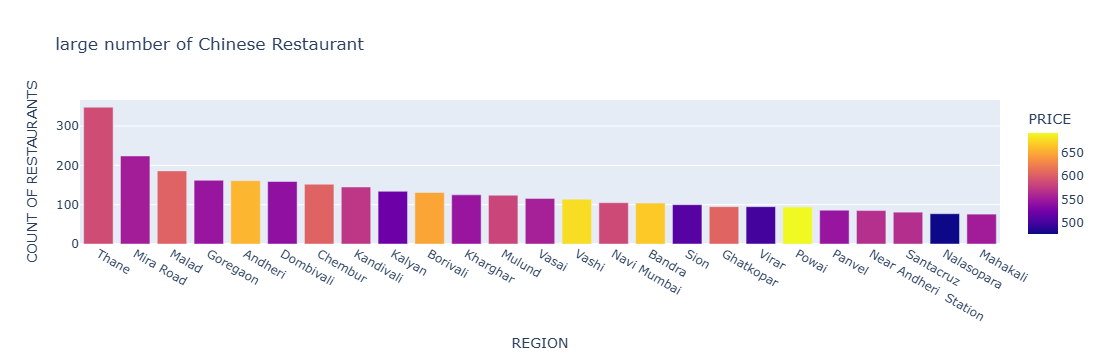

In [62]:
fig = px.bar(chinese_rest_df, y='COUNT OF RESTAURANTS', color='PRICE', x='REGION', title=('large number of Chinese Restaurant'))
fig.show()             

__Q8) Is there a relation between Price and Rating by each Cuisine Type?__

In [64]:
rel_df = Zomato_df.groupby(['RATING','CUSINE TYPE'])['PRICE'].mean().reset_index()
rel_df

,RATING,CUSINE TYPE,PRICE
0,1.8,Casual Dining,550.0
1,2.0,Casual Dining,600.0
2,2.1,Casual Dining,600.0
3,2.1,Quick Bites,500.0
4,2.2,Casual Dining,525.0
...,...,...,...
278,4.8,Casual Dining,850.0
279,4.8,Dessert Parlor,300.0
280,4.8,Quick Bites,300.0
281,4.9,Casual Dining,1200.0


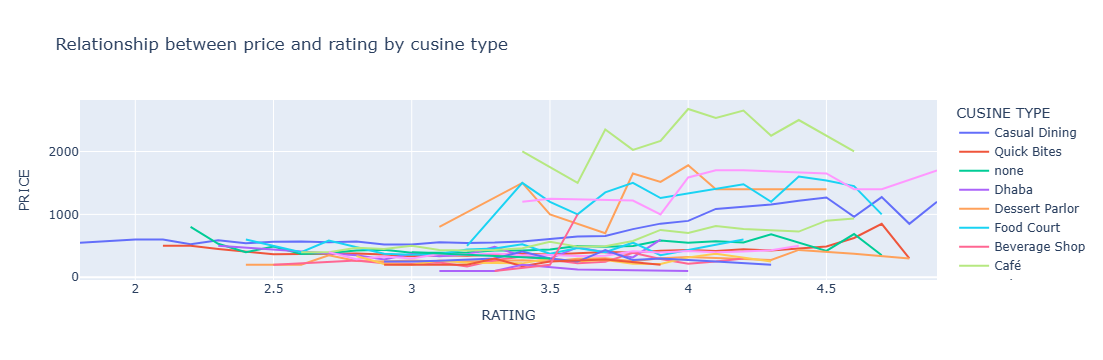

In [65]:
fig = px.line(rel_df,color='CUSINE TYPE', x='RATING', y='PRICE', title = "Relationship between price and rating by cusine type") 
fig.show()

__Q9) Is there a relation between Region and Price?__

In [67]:
rel_bw = Zomato_df.groupby(['REGION'])['PRICE'].mean().reset_index()
rel_bw

,REGION,PRICE
0,Airoli,452.287582
1,Alibaug,665.000000
2,Ambernath,514.000000
3,Andheri,579.779412
4,Andheri,592.993492
...,...,...
83,Vikhroli,480.434783
84,Vile Parle,464.457831
85,Virar,452.027027
86,Wadala,427.500000


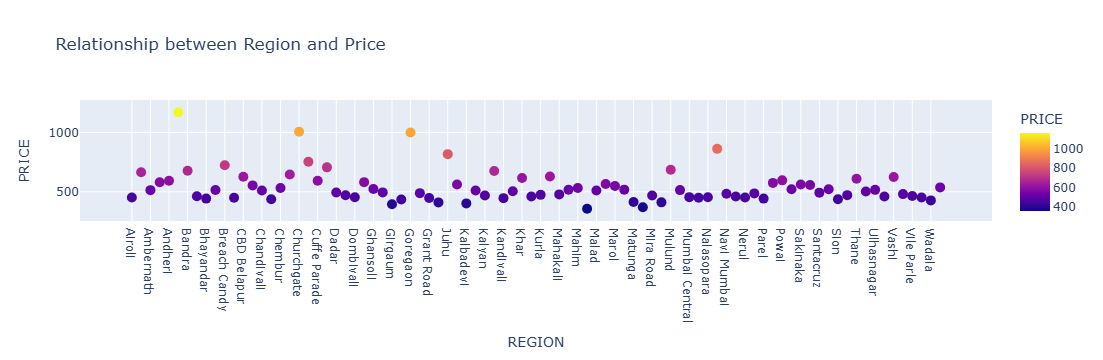

In [68]:
fig = px.scatter(rel_bw,x='REGION',y='PRICE', color = 'PRICE', title ='Relationship between Region and Price').update_traces(marker_size=10)
fig.show()

__Q10) Find the list of Affordable Restaurants?__
----The criteria for Affordable Restaurants would be:-----
1) Low Price 2) High Rated
First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
Let me explain:-The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the
restaurants that are 1/4th of 6000.

In [70]:
max_price = Zomato_df['PRICE'].max()
max_price = max_price/4
max_price

1250.0

__Low PRICE__

In [72]:
low_price = Zomato_df[['NAME','PRICE','CUSINE TYPE','CUSINE_CATEGORY','REGION']]
low_price = low_price[low_price['PRICE']<=1250]
low_price.sort_values(by = 'PRICE', inplace = True)
low_price

,NAME,PRICE,CUSINE TYPE,CUSINE_CATEGORY,REGION
6137,Sanjog Wine N Dine,5,Casual Dining,"North Indian,Chinese",Thane
2925,Jab We Eat,50,none,"South Indian,North Indian,Maharashtrian,Fast Food",Girgaum
9598,Ho5 Store,50,none,Fast Food,Matunga
9589,Golden Butterfly,100,Bakery,"Bakery,Desserts",Mira Road
5916,Madhuri Puranpoli,100,none,Maharashtrian,Vile Parle
...,...,...,...,...,...
2740,Peninsula Next,1200,Casual Dining,"North Indian,Mughlai,Chinese",Sion
5528,The Thekka,1200,Lounge,"Finger Food,Continental,North Indian,Chinese",Vashi
964,Bijoli Grill,1250,Casual Dining,Bengali,Powai
6045,Fabelle at The Chocolate Boutique - ITC Grand ...,1250,Dessert Parlor,Desserts,Parel


__HIGH RATED__

In [74]:
high_rated = Zomato_df[['NAME','CUSINE TYPE','CUSINE_CATEGORY','REGION','RATING','PRICE']]
high_rated = high_rated[high_rated['RATING']>=4.5]
high_rated.sort_values(by='PRICE', inplace = True)
high_rated

,NAME,CUSINE TYPE,CUSINE_CATEGORY,REGION,RATING,PRICE
1502,Cake Centre-The Dessert Maker,Dessert Parlor,Desserts,Mohammad Ali Road,4.6,150
763,Curry And Combos Twist,Quick Bites,"North Indian,Chinese",Andheri,4.5,200
807,Moussestruck,none,Desserts,Near Andheri Station,4.5,200
14234,Cone Culture,Casual Dining,European,Kharghar,4.6,250
725,Belo Pops,none,"Ice Cream,Desserts,Beverages",Andheri,4.5,300
...,...,...,...,...,...,...
5335,Mia Cucina,Casual Dining,Italian,Bandra,4.5,2000
1786,Global Fusion,Fine Dining,"Chinese,Japanese,Asian,North Indian",Worli,4.6,2000
8887,Drifters Tap Station,Casual Dining,"North Indian,Continental,European,American",Bandra,4.5,2000
12625,House of Mandarin,Casual Dining,"Chinese,Sushi,Asian",Bandra,4.5,2100


__Merging__

In [76]:
aff_rest = pd.merge(low_price,high_rated,how='inner',on=['NAME', 'REGION'])
# aff_rest
aff_rest = aff_rest[['NAME','CUSINE TYPE_x','CUSINE_CATEGORY_x','REGION','RATING','PRICE_x']]
aff_rest.rename(columns = {'CUSINE TYPE_X': 'CUSINE TYPE','CUSINE_CATEGORY_X': 'CUSINE_CATEGORY','RATING': 'RATING','PRICE_x': 'PRICE',
                          'NAME': 'NAME','REGION': 'REGION'},inplace = True)
aff_rest

,NAME,CUSINE TYPE_x,CUSINE_CATEGORY_x,REGION,RATING,PRICE
0,Cake Centre-The Dessert Maker,Dessert Parlor,Desserts,Mohammad Ali Road,4.6,150
1,Curry And Combos Twist,Quick Bites,"North Indian,Chinese",Andheri,4.5,200
2,Moussestruck,none,Desserts,Near Andheri Station,4.5,200
3,Cone Culture,Casual Dining,European,Kharghar,4.6,250
4,Smiley Pops,Dessert Parlor,"Desserts,Ice Cream,Beverages,Sandwich",Andheri,4.6,300
...,...,...,...,...,...,...
60,Wild Dining Restaurant,Casual Dining,"North Indian,Continental,Mexican,Chinese",Andheri,4.5,1200
61,Invento,Casual Dining,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,4.5,1200
62,Culinary Tales,Casual Dining,"Chinese,European,Continental,Salad,Italian,Pizza",Andheri,4.7,1200
63,Hitchki,Casual Dining,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,4.9,1200


__Q10) Find the list of most Reliable Restaurants?__
_The criteria for most Reliable Restaurants would be:-_
1) Low Price 2) High Rated 3) Large No. of Votes
First step will be to find the restaurants with Votes greater than Mean of Votes

__Large No. of Votes__

In [79]:
large_votes = Zomato_df['VOTES'].mean()
large_votes

177.2656679624538

In [80]:
large_votes = Zomato_df[['NAME','CUSINE TYPE','CUSINE_CATEGORY','REGION','RATING','PRICE','VOTES']]
large_votes=large_votes[large_votes['VOTES']>=177]
large_votes.sort_values(by='VOTES',inplace = True)
large_votes

,NAME,CUSINE TYPE,CUSINE_CATEGORY,REGION,RATING,PRICE,VOTES
411,The Hangout Pizza Hub,Quick Bites,"Pizza,Fast Food",Malad,3.7,400,177
14744,93 Chinatown,none,"Chinese,North Indian,Thai,Seafood",Goregaon,2.8,500,177
7668,The Dough Story,Dessert Parlor,Desserts,Vile Parle,3.9,300,177
1287,Mast Punjabi,Casual Dining,"Desserts,North Indian,Chinese,Indian",Dadar,3.9,700,177
3018,Modern Family Restaurant,Casual Dining,"Chinese,North Indian,Seafood,Fast Food,Beverages",Lower Parel,3.6,600,177
...,...,...,...,...,...,...,...
8539,Leopold Cafe & Bar,Casual Dining,"American,Chinese,Mughlai,Italian",Colaba,3.9,1600,7327
1251,Joey's Pizza,Quick Bites,Pizza,Malad,4.6,800,7350
5337,Chili's American Grill & Bar,Casual Dining,"American,Mexican,Burger,Tex-Mex",Powai,4.3,1400,7377
3751,Prithvi Cafe,Café,"Cafe,Fast Food",Juhu,4.4,700,8000


In [81]:
final_df = pd.merge(aff_rest,large_votes,how='inner',on=['NAME','REGION'])
final_df = final_df[['NAME','CUSINE TYPE_x','CUSINE_CATEGORY_x','REGION','PRICE_x','RATING_x','VOTES']]
final_df.rename(columns = {'NAME': 'NAME','CUSINE TYPE_x': 'CUSINE TYPE','CUSINE_CATEGORY_x': 'CUSINE_CATEGORY','REGION': 'REGION','PRICE_x': 'PRICE',
'RATING_x': 'RATING','VOTES': 'VOTES'},inplace=True)
final_df

,NAME,CUSINE TYPE,CUSINE_CATEGORY,REGION,PRICE,RATING,VOTES
0,Moussestruck,none,Desserts,Near Andheri Station,200,4.5,364
1,Cone Culture,Casual Dining,European,Kharghar,250,4.6,492
2,Belo Pops,none,"Ice Cream,Desserts,Beverages",Andheri,300,4.5,752
3,Dessertino,Dessert Parlor,"Desserts,Ice Cream",Kandivali,300,4.8,184
4,Big Bang Cuurry,none,"North Indian,Biryani,Rolls",Andheri,350,4.7,227
5,Coppetto Artisan Gelato,Dessert Parlor,"Ice Cream,Desserts",Bandra,350,4.6,759
6,Fresh Food Co.,none,"Continental,Healthy Food,Salad,Beverages,Desse...",Santacruz,500,4.5,182
7,Regano's,Casual Dining,"Continental,Fast Food,Italian,Desserts",Malad,600,4.6,223
8,Maharashtra Lunch Home,Casual Dining,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,600,4.6,209
9,Shuruwat- Veg Food Journey,Casual Dining,"Continental,Tea,South Indian,Fast Food,Pizza,N...",Ghatkopar,600,4.5,509
